# Earth version

Episode 1 
Episode 2 
Episode 3 
Episode 4 
Episode 5 
Episode 6 
Episode 7 
Episode 8 
Episode 9 
Episode 10 
Episode 11 
Episode 12 
Episode 13 
Episode 14 
Episode 15 
Episode 16 
Episode 17 
Episode 18 
Episode 19 
Episode 20 
Episode 21 
Episode 22 
Episode 23 
Episode 24 
Episode 25 
Episode 26 
Episode 27 
Episode 28 
Episode 29 
Episode 30 
Episode 31 
Episode 32 
Episode 33 
Episode 34 
Episode 35 
Episode 36 
Episode 37 
Episode 38 
Episode 39 
Episode 40 
Episode 41 
Episode 42 
Episode 43 
Episode 44 
Episode 45 
Episode 46 
Episode 47 
Episode 48 
Episode 49 
Episode 50 


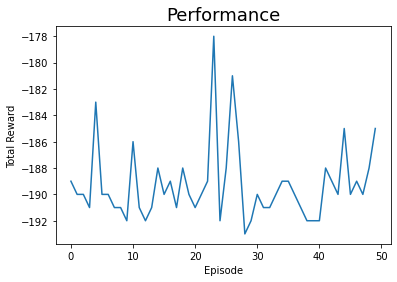

In [3]:
import gym
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

class QAgent:
    def __init__(self):
        #continuous state แบ่งช่วง
        #pd.cut([-1.3,1.3],bins=10,retbins=True)[0][1:-1]
        n_bins = 10
        self.position = np.linspace(-1.3,1.3,n_bins+1)[1:-1] #ตำแหน่งรถเข็น
        self.velocity = np.linspace(-3,3,n_bins+1)[1:-1] #ความเร็วรถเข็น
        self.pole_angle = np.linspace(-0.3,0.3,n_bins+1)[1:-1] #องศาไม้
        self.angular_velocity = np.linspace(-3,3,n_bins+1)[1:-1] #ความเร็วเชิงมุม
        self.learning_rate = 0.1
        self.discount_factor = 0.9
        self.epsilon = 0.1
        self.epsilon_decay_factor = 0.999
        self.q_table = np.zeros((n_bins, n_bins, n_bins, n_bins)+(env.action_space.n,)) #10,000 state
              
    # update q function with sample <s, a, r, s'> 
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        target = reward + self.discount_factor * np.max(self.q_table[next_state])
        self.q_table[state][action] = current_q + self.learning_rate *(target - current_q)
        
    def get_action(self,state):
        optimal_action = np.argmax(self.q_table[state])
        random_action = random.randint(0,env.action_space.n-1)
        #epsilon greedy
        action = np.random.choice([optimal_action,random_action],p=[1-self.epsilon, self.epsilon])
        return action
    
    def to_bins(self,value,bins):
        return np.digitize(value,bins=bins)
        
if __name__ == "__main__":
    env = gym.make('CartPole-v1')
    agent = QAgent()
    number_of_episodes = 50
    rewards = np.zeros(number_of_episodes)

    for i in range(number_of_episodes):
        observation = env.reset()
        position, velocity, pole_angle, angular_velocity = observation
        state = (agent.to_bins(position, agent.position), agent.to_bins(velocity, agent.velocity), 
                agent.to_bins(pole_angle, agent.pole_angle), agent.to_bins(angular_velocity, agent.angular_velocity))   
        while True:
            env.render()
            #print(observation)
            #take action
            action = agent.get_action(state)
            next_observation, reward, done, _ = env.step(action)
            next_position, next_velocity, next_pole_angle, next_angular_velocity = next_observation
            next_state = (agent.to_bins(next_position, agent.position), agent.to_bins(next_velocity, agent.velocity), 
                agent.to_bins(next_pole_angle, agent.pole_angle), agent.to_bins(next_angular_velocity, agent.angular_velocity))
            
            # -1 if agent mistake
            if done: 
                reward = -200
            else:
                reward = reward
            #learn
            agent.learn(state, action, reward, next_state)
            #update parameter
            agent.epsilon *= agent.epsilon_decay_factor
            state = next_state
            rewards[i] += reward

            if done:
                env.render()
                break
        print("Episode {} ".format(i+1))
        
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Performance',fontsize=18)
    #plt.show()
    env.close()